In [1]:
import numpy as np
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
import time
import seaborn as sns
import datetime
from datetime import date
from bs4 import BeautifulSoup as bs

## 1. Project Overview

The aim of the following analysis is to test out the old adage "you have to spend money to make money" within the film industry. As a self-anointed cinephile who spends much of his time either watching films after work or listening to film related podcasts during work, I've always been fascinated with the industry. 

Coming from a finance role/background, the financial side of film production has always been an area that I wanted to investigate further but I never had the tools to to obtain the sources of information required and to analyse it accordingly. 

This course has provided me with those missing tools and I will not let an opportunity pass to put this together both for purposes of this course and for my personal needs going forward. 

My first task in this project is to build a population of films with accurate production costs, to do this I had to pull a number of .csv files from different Kaggle sources, this was due to many only having film population from or up to certain dates which would have meant excluding certain major titles. I then reviewed them in Excel prior to loading them into Python. Once I had the population and the variable (Production Cost/Budget), I then considered what other variables would be best to compare the costs against.

Below are the other variables I aim to compare production costs against:
- Worldwide Gross Amounts:
    - Does spending more make more?
- IMDB User Ratings:
    - Does spending more increase audience enjoyment?
- Rotten Tomato Critic Scores:
    - Does spending more increase critical reception?

Using these three variables, I can expand on my analysis and see if there is a genuine correlation between production cost and the other variables along with other insights that will appear as I analyse.

## 2. Data Loading and Cleansing

The first step is to build up a population of films, I have sourced eight .csv files from Kaggle most of which provide a list of film titles, release dates/years, production costs and worldwide gross amounts. Only some of the files contain all of those variables so, I must build a Dataframes (DF) for production costs and worldwide grosses separately cleanse them removing duplicates and blanks before joining them as one. 

But first I should load the files:

## Loading the Film Production/Gross Files:

In [2]:
movie_filenames = os.listdir("C:/Users/New User/Documents/UCD/Assignment/assignment_files/csv_downloads/movie_data/") # lists the csv files in my folder

In [3]:
def extract_name_files(text): # this removes the .csv from the name the files in the folder
    name_file = text.strip('.csv').lower()
    return name_file

In [4]:
names_of_movie_files = list(map(extract_name_files,movie_filenames)) # creates the list that to be used to name the dataframes from the filenames

In [5]:
for i in range(0,len(names_of_movie_files)): # saves each csv in a dataframe structure
    exec(names_of_movie_files[i] + " =  pd.read_csv('C:/Users/New User/Documents/UCD/Assignment/assignment_files/csv_downloads/movie_data/'+movie_filenames[i])")

In [6]:
# I will then use the below to display the dataframes currently loaded:
%whos DataFrame

Variable                 Type         Data/Info
-----------------------------------------------
all_time_worldwide_bo    DataFrame         Rank  Year          <...>n\n[583 rows x 6 columns]
blockbuster              DataFrame         release_year  rank_i<...>\n[430 rows x 13 columns]
movie_industry_dataset   DataFrame                             <...>n[7633 rows x 15 columns]
tgm_bo_summary           DataFrame         Rank                <...>\n[1000 rows x 5 columns]
tmdb_movie               DataFrame             budget          <...>n[4802 rows x 20 columns]
tmds_movies_metadata     DataFrame           adult             <...>[45436 rows x 24 columns]
top_grossing_film        DataFrame             Release_Type    <...>\n[1000 rows x 7 columns]
top_movies_data          DataFrame         Release Date Movie T<...>\n[3896 rows x 5 columns]


## Loading the Film Rating Files:

Repeating the same steps as before but for the film rating files in a different folder, however this time I can reuse the extract_name_files(text) function defined earlier which means one less step:

In [7]:
rating_filenames = os.listdir("C:/Users/New User/Documents/UCD/Assignment/assignment_files/csv_downloads/rating_data/")

In [8]:
names_of_rating_files = list(map(extract_name_files,rating_filenames))

In [9]:
for i in range(0,len(names_of_rating_files)):
    exec(names_of_rating_files[i] + " =  pd.read_csv('C:/Users/New User/Documents/UCD/Assignment/assignment_files/csv_downloads/rating_data/'+rating_filenames[i])")

In [10]:
%whos DataFrame

Variable                 Type         Data/Info
-----------------------------------------------
all_time_worldwide_bo    DataFrame         Rank  Year          <...>n\n[583 rows x 6 columns]
blockbuster              DataFrame         release_year  rank_i<...>\n[430 rows x 13 columns]
imdb_movie_metadata      DataFrame          color      director<...>n[5043 rows x 28 columns]
imdb_top_1000            DataFrame                             <...>n[1000 rows x 16 columns]
movie_industry_dataset   DataFrame                             <...>n[7633 rows x 15 columns]
rotten_tomatoes_movie    DataFrame                            r<...>[17712 rows x 22 columns]
tgm_bo_summary           DataFrame         Rank                <...>\n[1000 rows x 5 columns]
tmdb_movie               DataFrame             budget          <...>n[4802 rows x 20 columns]
tmds_movies_metadata     DataFrame           adult             <...>[45436 rows x 24 columns]
top_grossing_film        DataFrame             Release_Typ

The number of files loaded as DataFrames has increased by the 3 rating files

To explore the contents of these DataFrames, I will create a new DataFrame and then use a loop to present the info of each of the loaded DataFrame

In [11]:
file_names = pd.DataFrame({'file': ['all_time_worldwide_bo','blockbuster','imdb_movie_metadata','imdb_top_1000','movie_industry_dataset',
                                    'rotten_tomatoes_movie','tgm_bo_summary','tmdb_movie','tmds_movies_metadata',
                                    'top_grossing_film','top_movies_data']})

In [12]:
for index, row in file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.info())')

all_time_worldwide_bo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     583 non-null    int64 
 1   Year                     583 non-null    int64 
 2   Movie                    583 non-null    object
 3   WorldwideBox Office      583 non-null    object
 4   DomesticBox Office       576 non-null    object
 5   InternationalBox Office  583 non-null    object
dtypes: int64(2), object(4)
memory usage: 27.5+ KB
None
blockbuster
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_year          430 non-null    int64  
 1   rank_in_year          430 non-null    int64  
 2   imdb_rating           430 non-null    float64
 3   mpaa_rating      

The above provides me with an overview of the DFs, I can see all columns within each DF and the data type contained within each column. In building my population, I will require columns containing:
- Film Title
    - For Obvious Reasons
- Release Date or Release Year
    - While having a full release date would be perfect as it would allow analysis by month and even day, I would settle for release year if it means getting a bigger population. 
- Production Costs Amount
    - The entire report hinges on the presence and accuracy of production costs for each film. 

I will start by building this population, extracting each of these columns from the files where all three columns are present, cleanse the data in each new subsetted version of the DF, amend the column headings to ensure they are uniformed in each new DF before stacking them to form a production cost population. I will then repeat the steps for the files containing gross box office figures.  


## Analysis of DataFrames:

Excluding the three film rating DFs (imdb_movie_metadata, imdb_top_1000 and rotten_tomatoes_movie) and the DFs which have no production costs or budgets (all_time_worldwide_bo, tgm_bo_summary and top_grossing_film), I am left with the following DFs and the relevent columns:
- blockbuster
    - release_year
    - film_title
    - film_budget
    - length_in_min
        - I am including the length to filter out movies 60 minutes or less where possible
- movie_industry_dataset
    - name
    - year
    - budget
    - runtime
- tmdb_movie
    - budget
    - release_date
    - runtime
    - title
- tmds_movies_metadata
    - budget
    - release_date
    - title
    - runtime
- top_movies_data
    - Release Date
    - Movie Title
    - Production Budget
    
I will use the column names from the blockbuster DF and change the other columns names to match those ones. In addition to the column name changes, the following steps will be taken to cleanse each DF:
- Filter out films 60 minutes and under
- Filter out and rows where the production costs are blanks
- Remove duplicates based one these two criteria in this order:
    - film_title & release_year
    - film_title & film_budget
        - This should remove any potential duplicates where multiple versions of the same title appear but should also retain films with identical titles produced in different years, remakes being a prime example of this. 

The files should be ready to be appended on top of each other at this point. 

The next stage will be to pull together the DFs containing the film grossing data which from the loaded DFs will be along with the columns required to join with the production DFs:
- all_time_worldwide_bo
    - Year
    - Movie
    - WorldwideBox Office
- blockbuster
    - release_year 
    - film_title
    - worldwide_gross   
- movie_industry_dataset
    - name
    - year
    - gross
- tgm_bo_summary
    - Title
    - Lifetime Gross
    - Year
- tmdb_movie
    - release_date
    - revenue
    - title                 
- tmds_movies_metadata
    - release_date
    - revenue
    - title
- top_grossing_film
    - Movie_Name
    - Lifetime Gross
    - Year  
- top_movies_data
    - Release Date
    - Movie Title
    - Worldwide Gross


In [13]:
# Before I begin to subset the files, I will cleanse some of the data based on the data type information provided above. I can see that budget columns in the Blockbuster and TMDS DFs are not numeric data types.

# The loop below will print the first two rows of each file to show me potential reasons for the issues with the data types.

for index, row in file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.head(2))')

all_time_worldwide_bo
   Rank  Year              Movie WorldwideBox Office DomesticBox Office  \
0     1  2009             Avatar      $2,845,899,541       $760,507,625   
1     2  2019  Avengers: Endgame      $2,797,800,564       $858,373,000   

  InternationalBox Office  
0          $2,085,391,916  
1          $1,939,427,564  
blockbuster
   release_year  rank_in_year  imdb_rating mpaa_rating         film_title  \
0          2019             1          8.5       PG-13  Avengers: Endgame   
1          2019             2          7.0          PG      The Lion King   

   film_budget  length_in_min domestic_distributor worldwide_gross  \
0  356,000,000            181         Walt Disney    2,797,800,564   
1  260,000,000            118         Walt Disney    1,656,943,394   

  domestic_gross    genre_1    genre_2 genre_3  
0    858,373,000     Action  Adventure   Drama  
1    543,638,043  Animation  Adventure   Drama  
imdb_movie_metadata
   color   director_name  num_critic_for_revie

In [14]:
# based on the above, the following changes are required for the data to be usable:
# remove commas and currency signs from columns where required
all_time_worldwide_bo['WorldwideBox Office']=all_time_worldwide_bo['WorldwideBox Office'].str.replace(',','')
all_time_worldwide_bo['WorldwideBox Office']=all_time_worldwide_bo['WorldwideBox Office'].str.replace('$','')
blockbuster['film_budget']=blockbuster['film_budget'].str.replace(',','')
blockbuster['worldwide_gross']=blockbuster['worldwide_gross'].str.replace(',','')
tgm_bo_summary['Lifetime Gross']=tgm_bo_summary['Lifetime Gross'].str.replace(',','')
tgm_bo_summary['Lifetime Gross']=tgm_bo_summary['Lifetime Gross'].str.replace('$','')

# change the data types of the columns to a numeric type
all_time_worldwide_bo['WorldwideBox Office'] = pd.to_numeric(all_time_worldwide_bo['WorldwideBox Office'])
blockbuster['film_budget'] = pd.to_numeric(blockbuster['film_budget'])
blockbuster['worldwide_gross'] = pd.to_numeric(blockbuster['worldwide_gross'])
tgm_bo_summary['Lifetime Gross'] = pd.to_numeric(tgm_bo_summary['Lifetime Gross'])
tmds_movies_metadata['budget'] = pd.to_numeric(tmds_movies_metadata['budget'])
tmds_movies_metadata['revenue'] = pd.to_numeric(tmds_movies_metadata['revenue'])
top_movies_data['Worldwide Gross'] = pd.to_numeric(top_movies_data['Worldwide Gross'])

In [15]:
# the below info will show the change has taken place for the budget data for both DFs

for index, row in file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.info())')

all_time_worldwide_bo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     583 non-null    int64 
 1   Year                     583 non-null    int64 
 2   Movie                    583 non-null    object
 3   WorldwideBox Office      583 non-null    int64 
 4   DomesticBox Office       576 non-null    object
 5   InternationalBox Office  583 non-null    object
dtypes: int64(3), object(3)
memory usage: 27.5+ KB
None
blockbuster
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_year          430 non-null    int64  
 1   rank_in_year          430 non-null    int64  
 2   imdb_rating           430 non-null    float64
 3   mpaa_rating      

To uniform the columns, I will rename, where required, to the following:
- release_year (or date)
- film_title
- film_budget
- film_runtime
- film_gross

In [16]:
## Changing the column names in each DF as described:

all_time_worldwide_bo.rename(columns={'Year': 'release_year','Movie': 'film_title', 'WorldwideBox Office': 'film_gross'}, inplace=True)

blockbuster.rename(columns={'length_in_min': 'film_runtime','worldwide_gross': 'film_gross'}, inplace=True)

imdb_movie_metadata.rename(columns={'movie_title': 'film_title','title_year': 'release_year'}, inplace=True)

imdb_top_1000.rename(columns={'Series_Title': 'film_title','IMDB_Rating': 'imdb_score', 'Released_Year':'release_year'}, inplace=True)

movie_industry_dataset.rename(columns={'year': 'release_year', 'name': 'film_title',
                                          'budget': 'film_budget', 'runtime': 'film_runtime','gross': 'film_gross'}, inplace=True)

rotten_tomatoes_movie.rename(columns={'movie_title': 'film_title','original_release_date': 'release_date'}, inplace=True)

tgm_bo_summary.rename(columns={'Title': 'film_title','Lifetime Gross': 'film_gross', 'Year': 'release_year'}, inplace=True)

tmdb_movie.rename(columns={'title': 'film_title','budget': 'film_budget', 'runtime': 'film_runtime','revenue': 'film_gross'}, inplace=True)

tmds_movies_metadata.rename(columns={'title': 'film_title','budget': 'film_budget', 
                                     'runtime': 'film_runtime','revenue': 'film_gross'}, inplace=True)

top_grossing_film.rename(columns={'Year': 'release_year', 'Movie_Name': 'film_title','Lifetime Gross': 'film_gross'}, inplace=True)

top_movies_data.rename(columns={'Release Date': 'release_date', 'Movie Title': 'film_title',
                                          'Production Budget': 'film_budget', 'Worldwide Gross': 'film_gross'}, inplace=True)

In [17]:
## where a release date is in the file, most of them are not formatted as date. The below will change this.

tmdb_movie['release_date'] = pd.to_datetime(tmdb_movie['release_date'])
tmds_movies_metadata['release_date'] = pd.to_datetime(tmds_movies_metadata['release_date'])
top_movies_data['release_date'] = pd.to_datetime(top_movies_data['release_date'])
rotten_tomatoes_movie['release_date'] = pd.to_datetime(rotten_tomatoes_movie['release_date'])

In [18]:
## extracting the year from the release date to ensure each of the DFs have a release year

tmdb_movie['release_year'] = pd.DatetimeIndex(tmdb_movie['release_date']).year
tmds_movies_metadata['release_year'] = pd.DatetimeIndex(tmds_movies_metadata['release_date']).year
top_movies_data['release_year'] = pd.DatetimeIndex(top_movies_data['release_date']).year
rotten_tomatoes_movie['release_year'] = pd.DatetimeIndex(rotten_tomatoes_movie['release_date']).year

In [19]:
## capitalising the film titles to reduce the risk of case sensitive issues when joining data later

all_time_worldwide_bo['film_title'] = all_time_worldwide_bo['film_title'].str.upper()
blockbuster['film_title'] = blockbuster['film_title'].str.upper()
imdb_movie_metadata['film_title'] = imdb_movie_metadata['film_title'].str.upper()
imdb_top_1000['film_title'] = imdb_top_1000['film_title'].str.upper()
movie_industry_dataset['film_title'] = movie_industry_dataset['film_title'].str.upper()
rotten_tomatoes_movie['film_title'] = rotten_tomatoes_movie['film_title'].str.upper()
tgm_bo_summary['film_title'] = tgm_bo_summary['film_title'].str.upper()
tmdb_movie['film_title'] = tmdb_movie['film_title'].str.upper()
tmds_movies_metadata['film_title'] = tmds_movies_metadata['film_title'].str.upper()
top_grossing_film['film_title'] = top_grossing_film['film_title'].str.upper()
top_movies_data['film_title'] = top_movies_data['film_title'].str.upper()

In [20]:
## removing any potential spaces before or after the film_title is a potential necessity as these can lead to joining issues down the line:

all_time_worldwide_bo['film_title'] = all_time_worldwide_bo['film_title'].str.strip()
blockbuster['film_title'] = blockbuster['film_title'].str.strip()
imdb_movie_metadata['film_title'] = imdb_movie_metadata['film_title'].str.strip()
imdb_top_1000['film_title'] = imdb_top_1000['film_title'].str.strip()
movie_industry_dataset['film_title'] = movie_industry_dataset['film_title'].str.strip()
rotten_tomatoes_movie['film_title'] = rotten_tomatoes_movie['film_title'].str.strip()
tgm_bo_summary['film_title'] = tgm_bo_summary['film_title'].str.strip()
tmdb_movie['film_title'] = tmdb_movie['film_title'].str.strip()
tmds_movies_metadata['film_title'] = tmds_movies_metadata['film_title'].str.strip()
top_grossing_film['film_title'] = top_grossing_film['film_title'].str.strip()
top_movies_data['film_title'] = top_movies_data['film_title'].str.strip()

In [21]:
## prior to removing duplicates, there are a number characters which may cause issues across the different DFs

replacements = {'-' : ' ',':' : ' ','...' : '','?' : '','!' : '','/' : '','\\' : '','&' : '','.' : '','PAJAMAS' : 'PYJAMAS'}

all_time_worldwide_bo['film_title'].replace(replacements, inplace=True)
blockbuster['film_title'].replace(replacements, inplace=True)
imdb_movie_metadata['film_title'].replace(replacements, inplace=True)
imdb_top_1000['film_title'].replace(replacements, inplace=True)
movie_industry_dataset['film_title'].replace(replacements, inplace=True)
rotten_tomatoes_movie['film_title'].replace(replacements, inplace=True)
tgm_bo_summary['film_title'].replace(replacements, inplace=True)
tmdb_movie['film_title'].replace(replacements, inplace=True)
tmds_movies_metadata['film_title'].replace(replacements, inplace=True)
top_grossing_film['film_title'].replace(replacements, inplace=True)
top_movies_data['film_title'].replace(replacements, inplace=True)

In [22]:
## the next step is to remove any potential duplicates in each of the DFs before creating the combined files, beginning with film_title and release year:

all_time_worldwide_bo.drop_duplicates(subset=['film_title','release_year'], inplace =True)
blockbuster.drop_duplicates(subset=['film_title','release_year'], inplace =True)
imdb_movie_metadata.drop_duplicates(subset=['film_title','release_year'], inplace =True)
imdb_top_1000.drop_duplicates(subset=['film_title','release_year'], inplace =True)
movie_industry_dataset.drop_duplicates(subset=['film_title','release_year'], inplace =True)
rotten_tomatoes_movie.drop_duplicates(subset=['film_title','release_year'], inplace =True)
tgm_bo_summary.drop_duplicates(subset=['film_title','release_year'], inplace =True)
tmdb_movie.drop_duplicates(subset=['film_title','release_year'], inplace =True)
tmds_movies_metadata.drop_duplicates(subset=['film_title','release_year'], inplace =True)
top_grossing_film.drop_duplicates(subset=['film_title','release_year'], inplace =True)
top_movies_data.drop_duplicates(subset=['film_title','release_year'], inplace =True)

In [23]:
## then removing duplicates based on film_title and either film_budget or film_gross:

all_time_worldwide_bo.drop_duplicates(subset=['film_title','film_gross'], inplace =True)
blockbuster.drop_duplicates(subset=['film_title','film_budget'], inplace =True)
movie_industry_dataset.drop_duplicates(subset=['film_title','film_budget'], inplace =True)
tgm_bo_summary.drop_duplicates(subset=['film_title','film_gross'], inplace =True)
tmdb_movie.drop_duplicates(subset=['film_title','film_budget'], inplace =True)
tmds_movies_metadata.drop_duplicates(subset=['film_title','film_budget'], inplace =True)
top_grossing_film.drop_duplicates(subset=['film_title','film_gross'], inplace =True)
top_movies_data.drop_duplicates(subset=['film_title','film_budget'], inplace =True)

In [24]:
## removing rows containing blanks in the same columns as I removed duplicates as these are key areas

all_time_worldwide_bo.dropna(subset=['film_title','release_year'], inplace =True)
blockbuster.dropna(subset=['film_title','release_year'], inplace =True)
imdb_movie_metadata.dropna(subset=['film_title','release_year'], inplace =True)
imdb_top_1000.dropna(subset=['film_title','release_year'], inplace =True)
movie_industry_dataset.dropna(subset=['film_title','release_year'], inplace =True)
rotten_tomatoes_movie.dropna(subset=['film_title','release_year'], inplace =True)
tgm_bo_summary.dropna(subset=['film_title','release_year'], inplace =True)
tmdb_movie.dropna(subset=['film_title','release_year'], inplace =True)
tmds_movies_metadata.dropna(subset=['film_title','release_year'], inplace =True)
top_grossing_film.dropna(subset=['film_title','release_year'], inplace =True)
top_movies_data.dropna(subset=['film_title','release_year'], inplace =True)

In [25]:
## then removing rows containing blanks based on film_title and either film_budget or film_gross:

all_time_worldwide_bo.dropna(subset=['film_title','film_gross'], inplace =True)
blockbuster.dropna(subset=['film_title','film_budget'], inplace =True)
movie_industry_dataset.dropna(subset=['film_title','film_budget'], inplace =True)
tgm_bo_summary.dropna(subset=['film_title','film_gross'], inplace =True)
tmdb_movie.dropna(subset=['film_title','film_budget'], inplace =True)
tmds_movies_metadata.dropna(subset=['film_title','film_budget'], inplace =True)
top_grossing_film.dropna(subset=['film_title','film_gross'], inplace =True)
top_movies_data.dropna(subset=['film_title','film_budget'], inplace =True)

In [26]:
## to reduce the populations even futher, I will remove movies with a run time of less than 60 minutes as I would classify these as shorts

blockbuster = blockbuster[blockbuster['film_runtime'] >= 60]
movie_industry_dataset = movie_industry_dataset[movie_industry_dataset['film_runtime'] >= 60]
tmdb_movie = tmdb_movie[tmdb_movie['film_runtime'] >= 60]
tmds_movies_metadata = tmds_movies_metadata[tmds_movies_metadata['film_runtime'] >= 60]

In [27]:
## in addition to the previous, I will also remove films with a runtime greater than 4 hours as these are most likely mini-series or a Russian epic

blockbuster = blockbuster[blockbuster['film_runtime'] < 240]
movie_industry_dataset = movie_industry_dataset[movie_industry_dataset['film_runtime'] < 240]
tmdb_movie = tmdb_movie[tmdb_movie['film_runtime'] < 240]
tmds_movies_metadata = tmds_movies_metadata[tmds_movies_metadata['film_runtime'] < 240]

In [28]:
## I will also remove any film which had a film_budget of zero:

blockbuster = blockbuster[blockbuster['film_budget'] > 0]
movie_industry_dataset = movie_industry_dataset[movie_industry_dataset['film_budget'] > 0]
tmdb_movie = tmdb_movie[tmdb_movie['film_budget'] > 0]
tmds_movies_metadata = tmds_movies_metadata[tmds_movies_metadata['film_budget'] > 0]
top_movies_data = top_movies_data[top_movies_data['film_budget'] > 0]

In [29]:
## checking now to see if there has been any initial reduction in numbers from the work done in the drop duplicates and drop NA

for index, row in file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.info())')

all_time_worldwide_bo
<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     583 non-null    int64 
 1   release_year             583 non-null    int64 
 2   film_title               583 non-null    object
 3   film_gross               583 non-null    int64 
 4   DomesticBox Office       576 non-null    object
 5   InternationalBox Office  583 non-null    object
dtypes: int64(3), object(3)
memory usage: 31.9+ KB
None
blockbuster
<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_year          430 non-null    int64  
 1   rank_in_year          430 non-null    int64  
 2   imdb_rating           430 non-null    float64
 3   mpaa_rating      

Based on the new figures some of the more notable changes in film title populations within the DFs are:
   - TMDS reduced by 36,803 titles (45,441 down to 8,638)
   - IMDB Metadata reduced by 230 titles (5,043 down to 4,813)
   - Movie Industry reduced by 2,177 titles (7,633 down to 5,456)
   - Rotten Tomatoes reduced by 1,168 titles (17,712 down to 16,544)
   - TMDB reduced by 1,047 titles (4,803 down to 3,756)

## Creating the combined files

The first step is to build out a file consisting of the dataframes that possess film_titles, release_year, film_budgets and where possible release_date and film runtime. This will create the population that I will join other combined dataframes to.

In [30]:
#Create new DFs with only the columns required
columns_to_subset1 = ['release_year', 'film_title', 'film_budget','film_runtime']
columns_to_subset2 = ['release_year', 'release_date', 'film_title', 'film_budget','film_runtime']
columns_to_subset3 = ['release_year', 'release_date', 'film_title', 'film_budget']
blockbuster_PD = blockbuster[columns_to_subset1]
movie_industry_dataset_PD = movie_industry_dataset[columns_to_subset1]
tmdb_movie_PD = tmdb_movie[columns_to_subset2]
tmds_movies_metadata_PD = tmds_movies_metadata[columns_to_subset2]
top_movies_data_PD = top_movies_data[columns_to_subset3]

In [31]:
production_file_names = pd.DataFrame({'file': ['blockbuster_PD','movie_industry_dataset_PD','tmdb_movie_PD','tmds_movies_metadata_PD',
                                    'top_movies_data_PD']})

In [32]:
for index, row in production_file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.info())')

blockbuster_PD
<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 429
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_year  430 non-null    int64 
 1   film_title    430 non-null    object
 2   film_budget   430 non-null    int64 
 3   film_runtime  430 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 16.8+ KB
None
movie_industry_dataset_PD
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5456 entries, 0 to 7631
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  5456 non-null   int64  
 1   film_title    5456 non-null   object 
 2   film_budget   5456 non-null   float64
 3   film_runtime  5456 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 213.1+ KB
None
tmdb_movie_PD
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 4798
Data columns (total 5 colu

In [33]:
for index, row in production_file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.head(2))')

blockbuster_PD
   release_year         film_title  film_budget  film_runtime
0          2019  AVENGERS: ENDGAME    356000000           181
1          2019      THE LION KING    260000000           118
movie_industry_dataset_PD
   release_year       film_title  film_budget  film_runtime
0          1980      THE SHINING   19000000.0         146.0
1          1980  THE BLUE LAGOON    4500000.0         104.0
tmdb_movie_PD
   release_year release_date                                film_title  \
0        2009.0   2009-10-12                                    AVATAR   
1        2007.0   2007-05-19  PIRATES OF THE CARIBBEAN: AT WORLD'S END   

   film_budget  film_runtime  
0    237000000         162.0  
1    300000000         169.0  
tmds_movies_metadata_PD
   release_year release_date film_title  film_budget  film_runtime
0        1995.0   1995-10-30  TOY STORY     30000000          81.0
1        1995.0   1995-12-15    JUMANJI     65000000         104.0
top_movies_data_PD
   release_year rel

In [34]:
# I will join the subsetted dataframes to create the single production file

production_file = pd.concat([blockbuster_PD,movie_industry_dataset_PD,tmdb_movie_PD,tmds_movies_metadata_PD,top_movies_data_PD],ignore_index=True)

In [35]:
production_file.head()

release_year                 film_title  film_budget  film_runtime  \
0        2019.0          AVENGERS: ENDGAME  356000000.0         181.0   
1        2019.0              THE LION KING  260000000.0         118.0   
2        2019.0                  FROZEN II  150000000.0         103.0   
3        2019.0  SPIDER-MAN: FAR FROM HOME  160000000.0         129.0   
4        2019.0             CAPTAIN MARVEL  175000000.0         123.0   

  release_date  
0          NaT  
1          NaT  
2          NaT  
3          NaT  
4          NaT

In [36]:
# The combined file numbers are now showing as:

production_file.info()
production_file.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22149 entries, 0 to 22148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_year  22149 non-null  float64       
 1   film_title    22149 non-null  object        
 2   film_budget   22149 non-null  float64       
 3   film_runtime  18277 non-null  float64       
 4   release_date  16263 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 865.3+ KB


release_year   film_budget  film_runtime
count   22149.00000  2.214900e+04  18277.000000
mean     2001.65407  3.348001e+07    107.830661
std        13.81417  4.239285e+07     20.138298
min      1914.00000  1.000000e+00     60.000000
25%      1996.00000  6.500000e+06     94.000000
50%      2005.00000  1.900000e+07    104.000000
75%      2011.00000  4.000000e+07    118.000000
max      2022.00000  4.000000e+08    238.000000

In [37]:
# I will now add a new column which makes the film_budget easier to read by displaying it in millions:

production_file['film_budget_$m'] = round(production_file['film_budget']/1000000,9)

In [38]:
# As I have combined five dataframes which may have contained several instances of the same file_titles, there is now a need to remove duplicates again

production_file.drop_duplicates(subset=['film_title','release_year'], inplace =True)

In [39]:
production_file.drop_duplicates(subset=['film_title','film_budget_$m'], inplace =True)

In [40]:
production_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10775 entries, 0 to 22148
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   release_year    10775 non-null  float64       
 1   film_title      10775 non-null  object        
 2   film_budget     10775 non-null  float64       
 3   film_runtime    10186 non-null  float64       
 4   release_date    5270 non-null   datetime64[ns]
 5   film_budget_$m  10775 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 589.3+ KB


In [41]:
production_file.sort_values("film_runtime", ascending=False).head(20)

release_year                         film_title  film_budget  \
9127         1939.0                 GONE WITH THE WIND    4000000.0   
710          1984.0        ONCE UPON A TIME IN AMERICA   30000000.0   
9524         1970.0                          WOODSTOCK     600000.0   
12287        2001.0  LAGAAN: ONCE UPON A TIME IN INDIA    5200000.0   
12513        1956.0               THE TEN COMMANDMENTS   13000000.0   
3311         2003.0                  GODS AND GENERALS   56000000.0   
449          1980.0                      HEAVEN'S GATE   44000000.0   
8215         1962.0                 LAWRENCE OF ARABIA   15000000.0   
13832        2008.0                       JODHAA AKBAR    8376800.0   
10189        1959.0                            BEN-HUR   15000000.0   
14317        1966.0                      CHELSEA GIRLS       3000.0   
14418        2004.0             SWADES: WE, THE PEOPLE    5000000.0   
3003         2001.0        KABHI KHUSHI KABHIE GHAM...    7500000.0   
5777         2019.0                       THE IRISHMAN  159000000.0   
12081        1956.0                      WAR AND PEACE    6000000.0   
13196        2005.0       NO DIRECTION HOME: BOB DYLAN    2000000.0   
12021        1960.0                             EXODUS    4000000.0   
9540         1954.0                      SEVEN SAMURAI    2000000.0   
15191        2011.0                     CHAPITEAU-SHOW    2000000.0   
1615         1992.0                          MALCOLM X   33000000.0   

       film_runtime release_date  film_budget_$m  
9127          238.0   1939-12-15          4.0000  
710           229.0          NaT         30.0000  
9524          225.0   1970-03-26          0.6000  
12287         224.0   2001-06-15          5.2000  
12513         220.0   1956-05-10         13.0000  
3311          219.0          NaT         56.0000  
449           219.0          NaT         44.0000  
8215          216.0   1962-10-12         15.0000  
13832         213.0   2008-02-15          8.3768  
10189         212.0   1959-12-26         15.0000  
14317         210.0   1966-09-15          0.0030  
14418         210.0   2004-12-17          5.0000  
3003          210.0          NaT          7.5000  
5777          209.0          NaT        159.0000  
12081         208.0   1956-08-21          6.0000  
13196         208.0   2005-07-21          2.0000  
12021         208.0   1960-03-27          4.0000  
9540          207.0   1954-04-26          2.0000  
15191         207.0   2011-12-12          2.0000  
1615          202.0          NaT         33.0000

In [42]:
## Using the below piece, I can search for specific titles or ranges of titles, such as the Avengers movies, Star Wars, Rocky and other series which may habe multiples which the duplicate checks failed to pick up on.

production_file[production_file["film_title"].str.contains('WOMAN')].sort_values("film_budget_$m", ascending=False)

release_year                            film_title  film_budget  \
22089        2020.0                     WONDER WOMAN 1984  200000000.0   
29           2017.0                          WONDER WOMAN  149000000.0   
3444         2004.0                              CATWOMAN  100000000.0   
5057         2014.0                       THE OTHER WOMAN   40000000.0   
1591         1992.0                      SCENT OF A WOMAN   31000000.0   
14917        2010.0                       THE OTHER WOMAN   30000000.0   
13705        2007.0           I COULD NEVER BE YOUR WOMAN   24000000.0   
4759         2012.0                    THE WOMAN IN BLACK   17000000.0   
292          1990.0                          PRETTY WOMAN   14000000.0   
22083        2018.0                     WOMAN WALKS AHEAD   12000000.0   
5275         2015.0                         WOMAN IN GOLD   11000000.0   
1214         1988.0                         ANOTHER WOMAN   10000000.0   
741          1984.0                      THE WOMAN IN RED    9000000.0   
2840         2000.0                          WOMAN ON TOP    8000000.0   
13887        2006.0                     THE UNKNOWN WOMAN    8000000.0   
3625         2005.0            DIARY OF A MAD BLACK WOMAN    5500000.0   
15425        2010.0        THE WOMAN WHO DREAMED OF A MAN    4000000.0   
12542        1942.0                     WOMAN OF THE YEAR    3000000.0   
9208         2004.0                 WOMAN THOU ART LOOSED    3000000.0   
14446        2008.0                    THE HEADLESS WOMAN    2700000.0   
13122        1978.0                    AN UNMARRIED WOMAN    2515000.0   
16378        2014.0  THE WOMAN IN BLACK 2: ANGEL OF DEATH    1000000.0   
14575        1928.0                    A WOMAN OF AFFAIRS     383000.0   
12691        1961.0                    A WOMAN IS A WOMAN     160000.0   
9614         1964.0                     THE MARRIED WOMAN     120000.0   
14285        1958.0           ATTACK OF THE 50 FOOT WOMAN      88000.0   
12600        1959.0                        THE WASP WOMAN      50000.0   

       film_runtime release_date  film_budget_$m  
22089           NaN   2020-12-16         200.000  
29            141.0          NaT         149.000  
3444          104.0          NaT         100.000  
5057          109.0          NaT          40.000  
1591          156.0          NaT          31.000  
14917          98.0   2010-10-28          30.000  
13705          97.0   2007-11-05          24.000  
4759           95.0          NaT          17.000  
292           119.0          NaT          14.000  
22083           NaN   2018-06-29          12.000  
5275          109.0          NaT          11.000  
1214           81.0          NaT          10.000  
741            87.0          NaT           9.000  
2840           92.0          NaT           8.000  
13887         118.0   2006-09-10           8.000  
3625          116.0          NaT           5.500  
15425         100.0   2010-01-21           4.000  
12542         114.0   1942-01-19           3.000  
9208           94.0   2004-09-30           3.000  
14446          87.0   2008-08-21           2.700  
13122         124.0   1978-05-26           2.515  
16378          90.0   2014-12-30           1.000  
14575          91.0   1928-12-15           0.383  
12691          84.0   1961-06-09           0.160  
9614           95.0   1964-04-12           0.120  
14285          65.0   1958-05-19           0.088  
12600          73.0   1959-02-11           0.050

The above check led to the removal of instances of the 1974 Star Wars movie, 2002 Wild Thonberrys Movie, 2014 Dragon Nest: Warrior's Dawn, Texas Chainsaw 3D, 2004 AVP: Alien Vs Predator and 2009 Monster Vs Aliens from the TMDS dataset.

ALIENÂ³ was removed from the tmdb_movies dataset. 

I also removed the 2003 Pirates of the Caribbean, 2009 Disney's A Christmas Carol & Disney's Planes from the top_movies dataset as result of data quality checks.

The duplicate removal function failed to pick these up due to the difference in film_title, for example, the inclusion of Disney caused the issue above. However, these small manual removals should reduce the value of double counts to provide a much clearer picture.

Before moving onto the film_gross table, it would be important to adjust the film_budget amounts for inflation to bring them up to date whilst also ensuring films made in the past do not have an unfair advantage compared to films made in this decade. 

To do this, I had pulled a .csv file from the FRED website but it did not go back far enough so I was able to source a website which provided the US average annual consumer price index (CPI) figures from 1913 up to mid/late 2021. 

To pull this data from the site, I will carry out web scraping.

In [43]:
inflation_site = requests.get('https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-') # connect to the site
inflation_table = bs(inflation_site.content, 'lxml') # make the site data easier to read

In [44]:
cpi_table = inflation_table.find("div", {"class":"i9-e-table__container i9-e-table__container--light"}) #finds the table within the page

In [45]:
cpi_data = pd.read_html(str(cpi_table))[0] #converts the new data into a dataframe

In [46]:
cpi_data.head()

Year  Annual Average Annual Percent Change  (rate of inflation)
0  1913             9.9                                        NaN
1  1914            10.0                                       1.3%
2  1915            10.1                                       0.9%
3  1916            10.9                                       7.7%
4  1917            12.8                                      17.8%

In [47]:
# The year column data contains some space and special characters that will need to be removed and then converted to a numeric value

cpi_data['Year']=cpi_data['Year'].str.replace('*','')
cpi_data['Year']=cpi_data['Year'].str.replace(' ','')

In [48]:
cpi_data['Year'] = pd.to_numeric(cpi_data['Year'])

In [49]:
cpi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        109 non-null    int64  
 1   Annual Average                              109 non-null    float64
 2   Annual Percent Change  (rate of inflation)  108 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


In [50]:
cpi_data.loc[cpi_data.Year.idxmax(), 'Annual Average'] #this will pull the value from the max year in the column header - 2021 in this case

271.4

In [51]:
current_cpi = cpi_data.loc[cpi_data.Year.idxmax(), 'Annual Average']

In [52]:
cpi_data['current_cpi_diff'] = (current_cpi - cpi_data['Annual Average'])/cpi_data['Annual Average'] # using the 2021 value to calculate the differences in each years average CPI

In [53]:
#I was finding difficulty in merging the data from this DF with the production DF, the following steps rectified this

cpi_data['cpi_year'] = round(cpi_data['Year']/1)

In [54]:
production_file['cpi_year'] = round(production_file['release_year']/1)

In [55]:
production_file = production_file.merge(cpi_data, how = 'left')

In [56]:
production_file['adjusted_film_budget_$m'] = round(production_file['film_budget_$m']*(1+production_file['current_cpi_diff']),2)

In [57]:
#I now have all I need to complete the production cost DF, I can now remove unnecessary columns to tidy the DF

columns_to_subset5 = ['release_year', 'release_date', 'film_title', 'film_budget_$m', 'adjusted_film_budget_$m']
production_file = production_file[columns_to_subset5]

In [58]:
production_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10775 entries, 0 to 10774
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   release_year             10775 non-null  float64       
 1   release_date             5270 non-null   datetime64[ns]
 2   film_title               10775 non-null  object        
 3   film_budget_$m           10775 non-null  float64       
 4   adjusted_film_budget_$m  10770 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 505.1+ KB


In [59]:
#one final step would be to remove films which had an adjusted budget of less than $10k as this will get rid of some additional annomolies

production_file = production_file[production_file['adjusted_film_budget_$m'] > 0.01]

In [60]:
production_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10507 entries, 0 to 10774
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   release_year             10507 non-null  float64       
 1   release_date             5009 non-null   datetime64[ns]
 2   film_title               10507 non-null  object        
 3   film_budget_$m           10507 non-null  float64       
 4   adjusted_film_budget_$m  10507 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 492.5+ KB


In [61]:
production_file.sort_values("film_budget_$m", ascending=False).head(5) # now I can compare the previous film budget top 5

release_year release_date                                film_title  \
0           2019.0          NaT                         AVENGERS: ENDGAME   
10          2018.0          NaT                    AVENGERS: INFINITY WAR   
20          2017.0          NaT   STAR WARS: EPISODE VIII - THE LAST JEDI   
120         2007.0          NaT  PIRATES OF THE CARIBBEAN: AT WORLD'S END   
5144        2017.0          NaT                            JUSTICE LEAGUE   

      film_budget_$m  adjusted_film_budget_$m  
0              356.0                   377.86  
10             321.0                   346.95  
20             317.0                   351.02  
120            300.0                   392.76  
5144           300.0                   332.19

In [62]:
production_file.sort_values("adjusted_film_budget_$m", ascending=False).head(5) # against the new top 5

release_year release_date                                film_title  \
120          2007.0          NaT  PIRATES OF THE CARIBBEAN: AT WORLD'S END   
0            2019.0          NaT                         AVENGERS: ENDGAME   
10271        1963.0   1963-06-12                                 CLEOPATRA   
138          2006.0          NaT                          SUPERMAN RETURNS   
20           2017.0          NaT   STAR WARS: EPISODE VIII - THE LAST JEDI   

       film_budget_$m  adjusted_film_budget_$m  
120             300.0                   392.76  
0               356.0                   377.86  
10271            42.0                   372.51  
138             270.0                   363.48  
20              317.0                   351.02

In [63]:
production_file[production_file["film_title"].str.contains('TANGLED')].sort_values("adjusted_film_budget_$m", ascending=False)

release_year release_date film_title  film_budget_$m  \
97        2010.0          NaT    TANGLED           260.0   

    adjusted_film_budget_$m  
97                   323.54

I will now create a new column which will be used to join the production and grossing files together but to do this I will need to add a new column with release_year as a string and then join that to the film_title as the lookup_column

In [64]:
production_file['lookup_year'] = production_file['release_year'].astype(str)

In [65]:
production_file['lookup_column'] = production_file["film_title"] + '-' + production_file['lookup_year']

In [66]:
production_file.head()

release_year release_date                 film_title  film_budget_$m  \
0        2019.0          NaT          AVENGERS: ENDGAME           356.0   
1        2019.0          NaT              THE LION KING           260.0   
2        2019.0          NaT                  FROZEN II           150.0   
3        2019.0          NaT  SPIDER-MAN: FAR FROM HOME           160.0   
4        2019.0          NaT             CAPTAIN MARVEL           175.0   

   adjusted_film_budget_$m lookup_year                     lookup_column  
0                   377.86      2019.0          AVENGERS: ENDGAME-2019.0  
1                   275.96      2019.0              THE LION KING-2019.0  
2                   159.21      2019.0                  FROZEN II-2019.0  
3                   169.82      2019.0  SPIDER-MAN: FAR FROM HOME-2019.0  
4                   185.75      2019.0             CAPTAIN MARVEL-2019.0

I will now repeat the above steps to create the dataset for the film_gross titles.

In [67]:
#Create new DFs with only the columns required
columns_to_subset5 = ['release_year', 'film_title', 'film_gross']

top_movies_data_GS = top_movies_data[columns_to_subset5]
blockbuster_GS = blockbuster[columns_to_subset5]
movie_industry_dataset_GS = movie_industry_dataset[columns_to_subset5]
all_time_worldwide_bo_GS = all_time_worldwide_bo[columns_to_subset5]
tmds_movies_metadata_GS = tmds_movies_metadata[columns_to_subset5]
top_grossing_film_GS = top_grossing_film[columns_to_subset5]
tmdb_movie_GS = tmdb_movie[columns_to_subset5]

In [68]:
gross_file_names = pd.DataFrame({'file': ['blockbuster_GS','movie_industry_dataset_GS','tmdb_movie_GS','tmds_movies_metadata_GS','top_movies_data_GS','all_time_worldwide_bo_GS',
                                    'top_grossing_film_GS','all_time_worldwide_bo_GS']})

In [69]:
for index, row in gross_file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.info())')

blockbuster_GS
<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 429
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_year  430 non-null    int64 
 1   film_title    430 non-null    object
 2   film_gross    430 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.4+ KB
None
movie_industry_dataset_GS
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5456 entries, 0 to 7631
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  5456 non-null   int64  
 1   film_title    5456 non-null   object 
 2   film_gross    5397 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 170.5+ KB
None
tmdb_movie_GS
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 4798
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -

In [70]:
for index, row in gross_file_names.iterrows():
    print(row['file'])
    exec('print('+row['file']+'.head(2))')

blockbuster_GS
   release_year         film_title  film_gross
0          2019  AVENGERS: ENDGAME  2797800564
1          2019      THE LION KING  1656943394
movie_industry_dataset_GS
   release_year       film_title  film_gross
0          1980      THE SHINING  46998772.0
1          1980  THE BLUE LAGOON  58853106.0
tmdb_movie_GS
   release_year                                film_title  film_gross
0        2009.0                                    AVATAR  2787965087
1        2007.0  PIRATES OF THE CARIBBEAN: AT WORLD'S END   961000000
tmds_movies_metadata_GS
   release_year film_title   film_gross
0        1995.0  TOY STORY  373554033.0
1        1995.0    JUMANJI  262797249.0
top_movies_data_GS
   release_year film_title  film_gross
0        2009.0          9    48559999
1        2008.0         21   159846429
all_time_worldwide_bo_GS
   release_year         film_title  film_gross
0          2009             AVATAR  2845899541
1          2019  AVENGERS: ENDGAME  2797800564
top_grossing_

In [71]:
# I will join the subsetted dataframes to create the single gross file

gross_file = pd.concat([top_movies_data_GS,blockbuster_GS,movie_industry_dataset_GS,all_time_worldwide_bo_GS,
                                    tmds_movies_metadata_GS,top_grossing_film_GS,tmdb_movie_GS],ignore_index=True)

In [72]:
gross_file[gross_file["film_title"].str.contains('GONE WITH')].sort_values("film_gross", ascending=False)

release_year          film_title   film_gross
19281        1939.0  GONE WITH THE WIND  402352579.0
10718        1939.0  GONE WITH THE WIND  400176459.0
23217        1939.0  GONE WITH THE WIND  400176459.0
10061        1939.0  GONE WITH THE WIND  390525192.0

In [73]:
gross_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23732 entries, 0 to 23731
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  23732 non-null  float64
 1   film_title    23732 non-null  object 
 2   film_gross    23673 non-null  float64
dtypes: float64(2), object(1)
memory usage: 556.3+ KB


In [74]:
# The combined file numbers are now showing as:

gross_file.info()
gross_file.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23732 entries, 0 to 23731
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  23732 non-null  float64
 1   film_title    23732 non-null  object 
 2   film_gross    23673 non-null  float64
dtypes: float64(2), object(1)
memory usage: 556.3+ KB


release_year    film_gross
count  23732.000000  2.367300e+04
mean    2002.023934  1.202167e+08
std       13.675573  2.159241e+08
min     1914.000000  0.000000e+00
25%     1996.000000  3.109904e+06
50%     2005.000000  3.378816e+07
75%     2012.000000  1.407680e+08
max     2022.000000  2.847246e+09

In [75]:
gross_file.sort_values("film_gross", ascending=False).head(5)

release_year         film_title    film_gross
8062        2009.0             AVATAR  2.847246e+09
285         2009.0             AVATAR  2.845900e+09
9758        2009.0             AVATAR  2.845900e+09
287         2019.0  AVENGERS: ENDGAME  2.797801e+09
9759        2019.0  AVENGERS: ENDGAME  2.797801e+09

In [76]:
gross_file[gross_file["film_title"].str.contains('GONE WITH')].sort_values("film_gross", ascending=False)

release_year          film_title   film_gross
19281        1939.0  GONE WITH THE WIND  402352579.0
10718        1939.0  GONE WITH THE WIND  400176459.0
23217        1939.0  GONE WITH THE WIND  400176459.0
10061        1939.0  GONE WITH THE WIND  390525192.0

The above shows there are duplicates within the combined file which means I will need to drop duplicates and also drop NAs from the film_gross column.

In [77]:
gross_file.dropna(subset=['film_gross'], inplace =True)

In [78]:
gross_file.drop_duplicates(subset=['film_title','release_year'], inplace =True)

In [79]:
# I will now add a new column which makes the film_gross easier to read by displaying it in millions:

gross_file['film_gross_$m'] = round(gross_file['film_gross']/1000000,9)

In [81]:
gross_file.sort_values("film_gross", ascending=False).head(5)

release_year                                  film_title    film_gross  \
285         2009.0                                      AVATAR  2.845900e+09   
287         2019.0                           AVENGERS: ENDGAME  2.797801e+09   
3545        1997.0                                     TITANIC  2.207987e+09   
3912        2015.0  STAR WARS: EPISODE VII - THE FORCE AWAKENS  2.068224e+09   
288         2018.0                      AVENGERS: INFINITY WAR  2.044541e+09   

      film_gross_$m  
285     2845.899541  
287     2797.800564  
3545    2207.986545  
3912    2068.223624  
288     2044.540523

In [82]:
gross_file[gross_file["film_title"].str.contains('ROUND')].sort_values("film_gross", ascending=False)

release_year                       film_title  film_gross  \
256          2004.0      AROUND THE WORLD IN 80 DAYS  72004159.0   
1196         1993.0                    GROUNDHOG DAY  71112677.0   
10736        1956.0  AROUND THE WORLD IN EIGHTY DAYS  42000000.0   
2047         1994.0                 ON DEADLY GROUND  38590458.0   
2366         1998.0                         ROUNDERS  22921898.0   
17           2009.0                        12 ROUNDS  17306648.0   
5444         1991.0                      ONCE AROUND  14851083.0   
1592         2002.0                 KNOCKAROUND GUYS  12419700.0   
22343        2001.0                 KNOCKAROUND GUYS  12000000.0   
2991         2013.0                THE FROZEN GROUND   5617460.0   
15783        2011.0                    HIGHER GROUND    841733.0   
5948         1995.0                      UNDERGROUND    171082.0   

       film_gross_$m  
256        72.004159  
1196       71.112677  
10736      42.000000  
2047       38.590458  
2366       22.921898  
17         17.306648  
5444       14.851083  
1592       12.419700  
22343      12.000000  
2991        5.617460  
15783       0.841733  
5948        0.171082

In [83]:
gross_file['cpi_year'] = round(gross_file['release_year']/1)

In [84]:
gross_file = gross_file.merge(cpi_data, how = 'left')

In [85]:
gross_file.head()

release_year film_title   film_gross  film_gross_$m  cpi_year  Year  \
0        2009.0          9   48559999.0      48.559999    2009.0  2009   
1        2009.0       1612    5400624.0       5.400624    2009.0  2009   
2        2009.0       2012  757677748.0     757.677748    2009.0  2009   
3        2009.0  12 ROUNDS   17306648.0      17.306648    2009.0  2009   
4        2009.0   17 AGAIN  139474906.0     139.474906    2009.0  2009   

   Annual Average Annual Percent Change  (rate of inflation)  current_cpi_diff  
0           214.5                                      -0.4%          0.265268  
1           214.5                                      -0.4%          0.265268  
2           214.5                                      -0.4%          0.265268  
3           214.5                                      -0.4%          0.265268  
4           214.5                                      -0.4%          0.265268

In [86]:
gross_file['adjusted_film_gross_$m'] = round(gross_file['film_gross_$m']*(1+gross_file['current_cpi_diff']),2)

In [87]:
gross_file[gross_file["film_title"].str.contains('CLERKS')].sort_values("film_gross", ascending=False)

release_year film_title  film_gross  film_gross_$m  cpi_year  Year  \
3668        2006.0  CLERKS II  26986174.0      26.986174    2006.0  2006   
4936        1994.0     CLERKS   3151130.0       3.151130    1994.0  1994   

      Annual Average Annual Percent Change  (rate of inflation)  \
3668           201.6                                       3.2%   
4936           148.2                                       2.6%   

      current_cpi_diff  adjusted_film_gross_$m  
3668          0.346230                   36.33  
4936          0.831309                    5.77

In [88]:
gross_file.sort_values("adjusted_film_gross_$m", ascending=False).tail(20)

release_year                  film_title  film_gross  film_gross_$m  \
246         2009.0            WOMEN IN TROUBLE     18097.0       0.018097   
1237        2007.0                  QUIET CITY     15425.0       0.015425   
1225        2007.0  ITTY BITTY TITTY COMMITTEE     18479.0       0.018479   
4685        2014.0                    BAREFOOT     15071.0       0.015071   
6454        1997.0                     SQUEEZE     10300.0       0.010300   
4468        2012.0                  TWICE BORN     18295.0       0.018295   
983         1998.0              HELL'S KITCHEN     11710.0       0.011710   
4205        2005.0                 CRUEL WORLD     16344.0       0.016344   
2623        2000.0                THE SPECIALS     13276.0       0.013276   
6610        1996.0                 SCHIZOPOLIS     10580.0       0.010580   
2438        1999.0            NATURALLY NATIVE     10508.0       0.010508   
975         1998.0                      SAVIOR     14328.0       0.014328   
1936        2016.0                   TERM LIFE     21256.0       0.021256   
2031        2015.0                 HROSS I OSS     11894.0       0.011894   
4447        2012.0            LAURENCE ANYWAYS     12250.0       0.012250   
4193        2005.0                       CHAOS     10289.0       0.010289   
267         2009.0             PETER AND VANDY     11276.0       0.011276   
3737        2006.0              ALONE WITH HER     10018.0       0.010018   
3273        2010.0                       LOGAN     10474.0       0.010474   
5290        2011.0              SPECIAL FORCES     10759.0       0.010759   

      cpi_year  Year  Annual Average  \
246     2009.0  2009           214.5   
1237    2007.0  2007           207.3   
1225    2007.0  2007           207.3   
4685    2014.0  2014           236.7   
6454    1997.0  1997           160.5   
4468    2012.0  2012           229.6   
983     1998.0  1998           163.0   
4205    2005.0  2005           195.3   
2623    2000.0  2000           172.2   
6610    1996.0  1996           156.9   
2438    1999.0  1999           166.6   
975     1998.0  1998           163.0   
1936    2016.0  2016           240.0   
2031    2015.0  2015           237.0   
4447    2012.0  2012           229.6   
4193    2005.0  2005           195.3   
267     2009.0  2009           214.5   
3737    2006.0  2006           201.6   
3273    2010.0  2010           218.1   
5290    2011.0  2011           224.9   

     Annual Percent Change  (rate of inflation)  current_cpi_diff  \
246                                       -0.4%          0.265268   
1237                                       2.9%          0.309214   
1225                                       2.9%          0.309214   
4685                                       1.6%          0.146599   
6454                                       2.3%          0.690966   
4468                                       2.1%          0.182056   
983                                        1.6%          0.665031   
4205                                       3.4%          0.389657   
2623                                       3.4%          0.576074   
6610                                       2.9%          0.729764   
2438                                       2.2%          0.629052   
975                                        1.6%          0.665031   
1936                                       1.3%          0.130833   
2031                                       0.1%          0.145148   
4447                                       2.1%          0.182056   
4193                                       3.4%          0.389657   
267                                       -0.4%          0.265268   
3737                                       3.2%          0.346230   
3273                                       1.6%          0.244383   
5290                                       3.2%          0.206759   

      adjusted_film_gross_$m  
246                     0.02  
1237                    0.02  
1225

In [90]:
columns_to_subset6 = ['release_year', 'film_title', 'film_gross_$m', 'adjusted_film_gross_$m']
gross_file = gross_file[columns_to_subset6]

In [95]:
#I will remove any films which grossed less than $10k
gross_file = gross_file[gross_file['adjusted_film_gross_$m'] > 0.01]

In [96]:
gross_file[gross_file["film_title"].str.contains('CLERKS')].sort_values("adjusted_film_gross_$m", ascending=False)

release_year film_title  film_gross_$m  adjusted_film_gross_$m
3668        2006.0  CLERKS II      26.986174                   36.33
4936        1994.0     CLERKS       3.151130                    5.77

In [97]:
gross_file.sort_values("adjusted_film_gross_$m", ascending=False).head(20)

release_year                                  film_title  film_gross_$m  \
7812        1939.0                          GONE WITH THE WIND     390.525192   
7855        1951.0                         ALICE IN WONDERLAND     572.000000   
7831        1942.0                                       BAMBI     268.000000   
6370        1997.0                                     TITANIC    2207.986545   
15          2009.0                                      AVATAR    2845.899541   
7843        1937.0             SNOW WHITE AND THE SEVEN DWARFS     184.925486   
5866        1977.0                                   STAR WARS     775.398007   
1287        2019.0                           AVENGERS: ENDGAME    2797.800564   
7837        1950.0                                  CINDERELLA     263.591415   
7757        1973.0                                THE EXORCIST     428.214478   
7682        1965.0                          THE SOUND OF MUSIC     286.214195   
7160        1975.0                                        JAWS     470.700000   
2139        2015.0  STAR WARS: EPISODE VII - THE FORCE AWAKENS    2068.223624   
5847        1977.0          STAR WARS: EPISODE IV - A NEW HOPE     503.015849   
7314        1982.0                  E.T. THE EXTRA-TERRESTRIAL     792.962972   
2814        2018.0                      AVENGERS: INFINITY WAR    2044.540523   
6741        1993.0                               JURASSIC PARK    1045.573035   
7864        1961.0              ONE HUNDRED AND ONE DALMATIANS     215.880014   
2039        2015.0                              JURASSIC WORLD    1669.979967   
4916        1994.0                               THE LION KING     986.214868   

      adjusted_film_gross_$m  
7812                 7625.07  
7855                 5970.80  
7831                 4462.28  
6370                 3733.63  
15                   3600.83  
7843                 3485.33  
5866                 3472.66  
1287                 2969.59  
7837                 2968.41  
7757                 2617.51  
7682                 2465.99  
7160                 2374.50  
2139                 2368.42  
5847                 2252.78  
7314                 2230.16  
2814                 2209.83  
6741                 1963.80  
7864                 1959.53  
2039                 1912.37  
4916                 1806.06

In [98]:
gross_file['lookup_year'] = gross_file['release_year'].astype(str)

In [99]:
gross_file['lookup_column'] = gross_file["film_title"] + '-' + gross_file['lookup_year']

In [100]:
gross_file.sort_values("adjusted_film_gross_$m", ascending=False).head(5)

release_year           film_title  film_gross_$m  \
7812        1939.0   GONE WITH THE WIND     390.525192   
7855        1951.0  ALICE IN WONDERLAND     572.000000   
7831        1942.0                BAMBI     268.000000   
6370        1997.0              TITANIC    2207.986545   
15          2009.0               AVATAR    2845.899541   

      adjusted_film_gross_$m lookup_year               lookup_column  
7812                 7625.07      1939.0   GONE WITH THE WIND-1939.0  
7855                 5970.80      1951.0  ALICE IN WONDERLAND-1951.0  
7831                 4462.28      1942.0                BAMBI-1942.0  
6370                 3733.63      1997.0              TITANIC-1997.0  
15                   3600.83      2009.0               AVATAR-2009.0

In [101]:
film_financial_data = production_file.merge(gross_file, how = 'left')

In [102]:
film_financial_data.head(3)

release_year release_date         film_title  film_budget_$m  \
0        2019.0          NaT  AVENGERS: ENDGAME           356.0   
1        2019.0          NaT      THE LION KING           260.0   
2        2019.0          NaT          FROZEN II           150.0   

   adjusted_film_budget_$m lookup_year             lookup_column  \
0                   377.86      2019.0  AVENGERS: ENDGAME-2019.0   
1                   275.96      2019.0      THE LION KING-2019.0   
2                   159.21      2019.0          FROZEN II-2019.0   

   film_gross_$m  adjusted_film_gross_$m  
0    2797.800564                 2969.59  
1    1654.367425                 1755.95  
2    1445.182280                 1533.92

In [103]:
film_financial_data[film_financial_data["film_title"].str.contains('CLERKS')].sort_values("adjusted_film_gross_$m", ascending=False)

release_year release_date film_title  film_budget_$m  \
3531        2006.0          NaT  CLERKS II           5.000   
1741        1994.0          NaT     CLERKS           0.027   

      adjusted_film_budget_$m lookup_year     lookup_column  film_gross_$m  \
3531                     6.73      2006.0  CLERKS II-2006.0      26.986174   
1741                     0.05      1994.0     CLERKS-1994.0       3.151130   

      adjusted_film_gross_$m  
3531                   36.33  
1741                    5.77

In [104]:
film_financial_data['film_net_amount $m'] = film_financial_data['adjusted_film_gross_$m'] - film_financial_data['adjusted_film_budget_$m']

In [105]:
film_financial_data[film_financial_data["film_title"].str.contains('CLERKS')].sort_values("adjusted_film_gross_$m", ascending=False)

release_year release_date film_title  film_budget_$m  \
3531        2006.0          NaT  CLERKS II           5.000   
1741        1994.0          NaT     CLERKS           0.027   

      adjusted_film_budget_$m lookup_year     lookup_column  film_gross_$m  \
3531                     6.73      2006.0  CLERKS II-2006.0      26.986174   
1741                     0.05      1994.0     CLERKS-1994.0       3.151130   

      adjusted_film_gross_$m  film_net_amount  
3531                   36.33            29.60  
1741                    5.77             5.72

In [111]:
film_financial_data['gross_multiple_of_budget'] = (round(film_financial_data['adjusted_film_gross_$m'],2) / round(film_financial_data['adjusted_film_budget_$m'],2))

In [112]:
film_financial_data['%_vs_budget'] = ((film_financial_data['adjusted_film_gross_$m'] - film_financial_data['adjusted_film_budget_$m']) / film_financial_data['adjusted_film_budget_$m'])*100

In [130]:
film_financial_data[film_financial_data["film_title"].str.contains('GONE W')].sort_values("adjusted_film_gross_$m", ascending=False)

release_year release_date          film_title  film_budget_$m  \
6076        1939.0   1939-12-15  GONE WITH THE WIND             4.0   

      adjusted_film_budget_$m lookup_year              lookup_column  \
6076                     78.1      1939.0  GONE WITH THE WIND-1939.0   

      film_gross_$m  adjusted_film_gross_$m  film_net_amount  \
6076     390.525192                 7625.07          7546.97   

      gross_multiple_of_budget  %_vs_budget  
6076                 97.632138  9663.213828

Taking my first steps into analysing the financial data I've now pulled together, I can use visualisation via a scatterplot chart to display where the film titles fall when we plot them by by adjusted gross and budget. 

<AxesSubplot:xlabel='adjusted_film_budget_$m', ylabel='adjusted_film_gross_$m'>

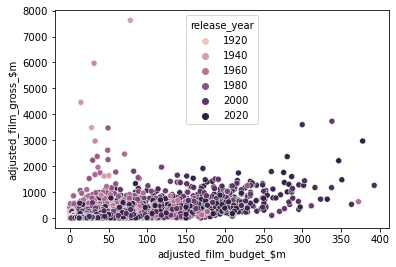

In [142]:
sns.scatterplot(x='adjusted_film_budget_$m',y='adjusted_film_gross_$m', data=film_financial_data, hue='release_year')

Looking at the outliers above, the movies which made most money do not tend to have cost the most, the movies which break the $4bn all appear to have cost less than $100m. 

In [131]:
film_financial_data.corr().loc['adjusted_film_budget_$m','adjusted_film_gross_$m']

0.540796905760396